In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import math
import numpy as np
from os import listdir
from os.path import isfile, join
import pickle as pkl
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse/")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils/")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs/")
from kde.pykde import gaussian_kde
from sklearn.neighbors import KernelDensity
from scipy.interpolate import RegularGridInterpolator
from Detector import *
from Plot_Histogram import *
from Signal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<font color="darkmagenta"> Response function from MC </font>

In [4]:
set = '0000'
MC = ExtractMC(['14'+set, '12'+set, '16'+set])


Text(0, 0.5, 'reco energy [GeV]')

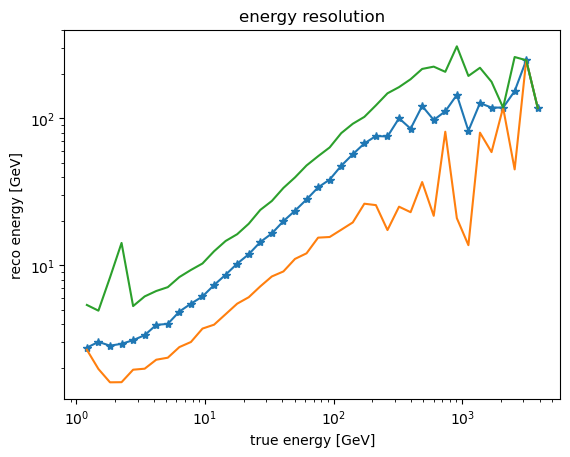

In [3]:
Etrue = pow(10,np.linspace(np.log10(1e-5), np.log10(8000), 100))
E = np.array([])
median = np.array([])
low = np.array([])
up = np.array([])
for i in range(Etrue.size-1):
    loc = np.where((MC['E_true']>= Etrue[i])&
                    (MC['E_true']<= Etrue[i+1])& (MC['E_true']<= Etrue[i+1]) & (MC['nutype']==14)
                    & (MC['psi_true']<10)
                    # & (MC['w']<5000)
                    )
    if loc[0].size==0:
        continue
    E = np.append(E, np.sqrt(Etrue[i]*Etrue[i+1]))

    Ereco = MC['E_reco'][loc]
    reso = np.percentile(Ereco, [10, 50, 90])
    low = np.append(low, reso[0])
    median = np.append(median, reso[1])
    up = np.append(up, reso[2])

plt.plot(E, median, marker='*')
plt.plot(E, low)
plt.plot(E, up)
plt.xscale('log')
plt.yscale('log')
plt.title('energy resolution')
plt.xlabel('true energy [GeV]')
plt.ylabel('reco energy [GeV]')    
    

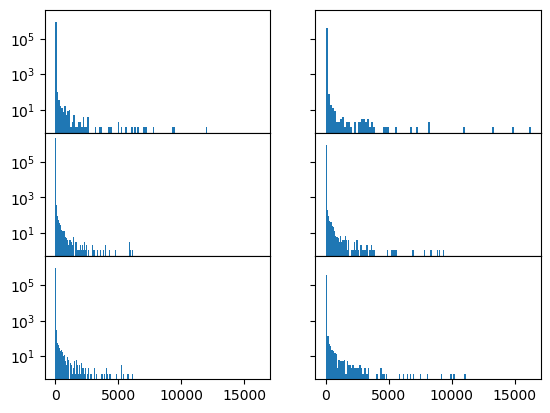

In [5]:
fig = plt.figure()
gs = fig.add_gridspec(3, 2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
i=0
for nu in [12, 14, 16]:
    loc = np.where((MC['nutype']==nu))    
    axs[i,0].hist(MC['w'][loc], 100)
    # axs[i,0].set_title('MC Weight - PDG {}'.format(nu))
    axs[i,0].semilogy()

    loc = np.where((MC['nutype']==-nu))    
    axs[i,1].hist(MC['w'][loc], 100)
    # axs[i,1].set_title('MC Weight - PDG {}'.format(-nu))
    axs[i,1].semilogy()

    i +=1

[]

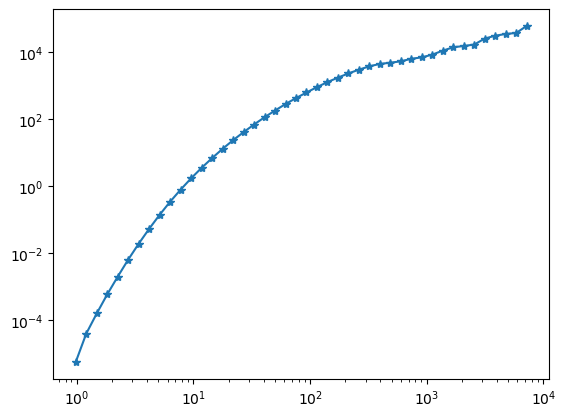

In [6]:
E = np.array([])
Aeff = np.array([])
for i in range(Etrue.size-1):
    loc = np.where((MC['E_true']>= Etrue[i])&
                    (MC['E_true']<= Etrue[i+1])& (MC['E_true']<= Etrue[i+1]) & (MC['nutype']==12) #& (MC['w']<4000)
                    )

    if loc[0].size==0:        continue
    E = np.append(E, np.sqrt(Etrue[i]*Etrue[i+1]))
    Aeff = np.append(Aeff, np.sum(MC['w'][loc]))
    
plt.plot(E, Aeff, marker='*')
plt.semilogx()
plt.semilogy()

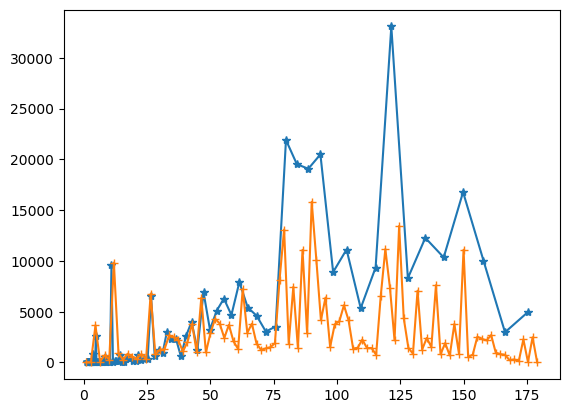

In [13]:
psitrue = np.exp(np.linspace(np.log(1.), np.log(180), 100))
# psitrue = np.linspace(0, 180, 100)

psi = np.array([])
Aeff = np.array([])
for i in range(psitrue.size-1):
    loc = np.where((MC['psi_true']>= psitrue[i])&
                    (MC['psi_true']<= psitrue[i+1]) & (MC['nutype']==12)
                    )

    if loc[0].size==0:   continue
    psi = np.append(psi, np.sqrt(psitrue[i]*psitrue[i+1]))
    # psi = np.append(psi, (psitrue[i]+psitrue[i+1])/2)

    Aeff = np.append(Aeff, np.sum(MC['w'][loc]))

psitruelin = np.linspace(1e-2, 180, 100)
# psitrue = np.linspace(0, 180, 100)

psilin = np.array([])
Aefflin = np.array([])
for i in range(psitruelin.size-1):
    loc = np.where((MC['psi_true']>= psitruelin[i])&
                    (MC['psi_true']<= psitruelin[i+1]) & (MC['nutype']==12)
                    )

    if loc[0].size==0:   continue
    psilin = np.append(psilin, (psitruelin[i]+psitruelin[i+1])/2.)

    Aefflin = np.append(Aefflin, np.sum(MC['w'][loc]))

plt.plot(psi, Aeff, marker='*')
plt.plot(psilin, Aefflin, marker='+')
# plt.semilogx()
# plt.semilogy()

[1.00000000e-05 1.18381975e-05 1.40142920e-05 1.65903956e-05
 1.96400380e-05 2.32502648e-05 2.75241227e-05 3.25836000e-05
 3.85731092e-05 4.56636085e-05 5.40574815e-05 6.39943142e-05
 7.57577330e-05 8.96835005e-05 1.06169099e-04 1.25685076e-04
 1.48788475e-04 1.76138736e-04 2.08516514e-04 2.46845967e-04
 2.92221131e-04 3.45937146e-04 4.09527225e-04 4.84806417e-04
 5.73923411e-04 6.79421869e-04 8.04313026e-04 9.52161645e-04
 1.12718776e-03 1.33438713e-03 1.57967384e-03 1.87004909e-03
 2.21380104e-03 2.62074139e-03 3.10248542e-03 3.67278351e-03
 4.34791366e-03 5.14714605e-03 6.09329315e-03 7.21336077e-03
 8.53931894e-03 1.01090144e-02 1.19672509e-02 1.41670680e-02
 1.67712548e-02 1.98541427e-02 2.35037262e-02 2.78241753e-02
 3.29388082e-02 3.89936117e-02 4.61614076e-02 5.46467859e-02
 6.46919444e-02 7.65836014e-02 9.06611798e-02 1.07326495e-01
 1.27055225e-01 1.50410484e-01 1.78058902e-01 2.10789644e-01
 2.49536944e-01 2.95406762e-01 3.49708359e-01 4.13991662e-01
 4.90091505e-01 5.801800

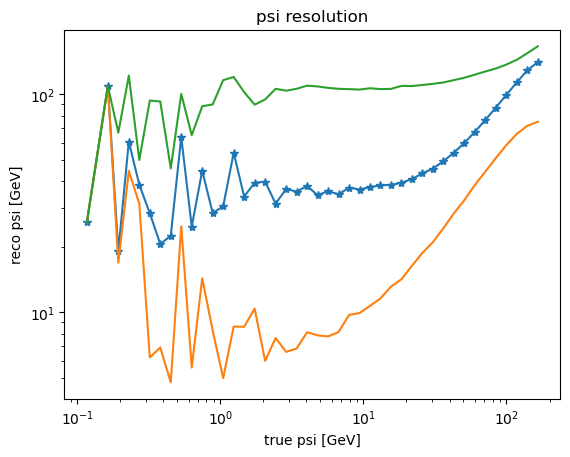

In [12]:
psitrue = np.exp(np.linspace(np.log(1e-5), np.log(180), 100))
psi = np.array([])
median = np.array([])
low = np.array([])
up = np.array([])
for i in range(psitrue.size-1):
    loc = np.where((MC['psi_true']>= psitrue[i])&
                    (MC['psi_true']<= psitrue[i+1])& (MC['psi_true']<= psitrue[i+1]) & (MC['nutype']==14) & (MC['w']<4000)
                    )
    if loc[0].size==0:
        continue
    psi = np.append(psi, np.sqrt(psitrue[i]*psitrue[i+1]))

    psireco = MC['psi_reco'][loc]
    reso = np.percentile(psireco, [10, 50, 90])
    low = np.append(low, reso[0])
    median = np.append(median, reso[1])
    up = np.append(up, reso[2])

plt.plot(psi, median, marker='*')
plt.plot(psi, low)
plt.plot(psi, up)
plt.title('psi resolution')
plt.xlabel('true psi [GeV]')
plt.ylabel('reco psi [GeV]')
plt.semilogx()
plt.semilogy()
print(psitrue)

[]

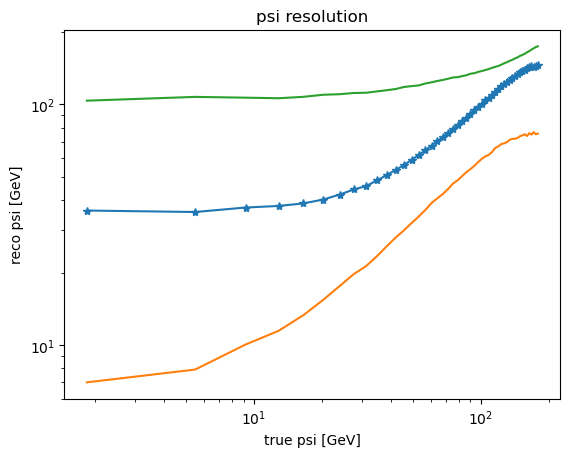

In [14]:
psitrue = np.linspace(0, 180)
psi = np.array([])
median = np.array([])
low = np.array([])
up = np.array([])
for i in range(psitrue.size-1):
    loc = np.where((MC['psi_true']>= psitrue[i])&
                    (MC['psi_true']<= psitrue[i+1])& (MC['psi_true']<= psitrue[i+1]) & (MC['nutype']==14)
                    )
    if loc[0].size==0:
        continue
    psi = np.append(psi, (psitrue[i]+psitrue[i+1])/2.)

    psireco = MC['psi_reco'][loc]
    reso = np.percentile(psireco, [10, 50, 90])
    low = np.append(low, reso[0])
    median = np.append(median, reso[1])
    up = np.append(up, reso[2])

plt.plot(psi, median, marker='*')
plt.plot(psi, low)
plt.plot(psi, up)
plt.title('psi resolution')
plt.xlabel('true psi [GeV]')
plt.ylabel('reco psi [GeV]')
plt.semilogx()
plt.semilogy()   

<font color="darkmagenta"> Response function with kde </font>

In [5]:
# KDE:
from KDEpy import FFTKDE
from KDEpy.bw_selection import improved_sheather_jones

In [6]:
set = '0000'
MCcut = ExtractMC(['14'+set, '12'+set, '16'+set])

In [7]:

def makeedges(center):
    width = center[1]-center[0]
    edges = np.array([center[i]-width/2. for i in range(center.size)])
    edges = np.append(edges, edges[-1]+width)
    return edges


In [8]:
# Compute the response matrix in log10Ereco, log10Etrue, logpsitrue and logpsireco

NEreco = 50
NEtrue = 300
# NEreco = 50
# NEtrue = 100
Npsitrue = 100
Npsireco = 100
# Npsitrue = 50
# Npsireco = 18
maxEtrue = 3100
maxEreco = 1000

logEtrue = np.linspace(np.log10(1.), np.log10(maxEtrue), NEtrue)
logEreco = np.linspace(np.log10(1.), np.log10(maxEreco), NEreco)
logpsitrue = np.linspace(np.log10(1e-2), np.log10(180.), Npsitrue)
# psitrue = np.linspace(0, 180, Npsitrue)
logpsireco = np.linspace(np.log10(1e-2), np.log10(180.), Npsireco)
# psireco = np.linspace(0, 180, Npsireco)

Edge =(makeedges(logpsitrue), makeedges(logEtrue), makeedges(logpsireco), makeedges(logEreco))

g_psi_true, g_energy_true, g_psi_reco, g_energy_reco = np.meshgrid(logpsitrue, logEtrue, 
            logpsireco, logEreco, indexing='ij')     

psiE_eval = np.vstack([g_psi_true.flatten(), g_energy_true.flatten(), g_psi_reco.flatten(), g_energy_reco.flatten()])

In [347]:
g_energy_true.shape

(100, 100, 50, 50)

In [9]:

# Separate MC by each channel nutype->PID:
nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
# nu_types = ["nu_mu"]
Scramble=False
# mirror= False
pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}
# PID = [[0.,0.5],[0.5, 0.85],[0.85, 1]]
PID = [[0.,1.]]
Resp = dict()
pidbin = 0
for pid in PID:
    print("Computing {} PID bin".format(pid))
    # Resp[pidbin] = dict()
    # pidbin += 1
    for nu_type in nu_types:
        print("----{}".format(nu_type))

        psirecoMC=MCcut["psi_reco"]
        if Scramble:
            print("Scrambled Response matrix")
            RAreco = MCcut["RA_reco"]
            Decreco = MCcut["Dec_reco"]
            # Create scramble RA:
            RAreco_Scr = np.random.uniform(0,2.*np.pi, size=len(RAreco))
            # Get correct psi from scramble RA and original DEC
            psirecoMC = np.rad2deg(psi_f(RAreco_Scr, Decreco))

        loc = np.where(  (MCcut["nutype"]==pdg_encoding[nu_type]) & (MCcut["PID"]>=pid[0])
                        & (MCcut["PID"]<=pid[1]) 
                        & (MCcut["E_reco"] <= maxEreco)
                        & (MCcut["E_reco"] >= 1. )
                        & (MCcut["E_true"] <= maxEtrue)
                        # & (MCcut["w"] <= 5000)
                        & (MCcut["E_true"] >= 1.)
                        # & (MCcut["psi_true"] < np.max(Bin["true_psi_center"]))
                        & (MCcut["psi_true"] >= 1e-2)
                        # & (psireco < np.max(Bin["reco_psi_center"]))
                        & (MCcut["psi_reco"] >= 1e-2)
                        )
        # loc_renorm = np.where(  (MCcut["nutype"]==pdg_encoding[nu_type]) & (MCcut["PID"]>=pid[0])
        #         & (MCcut["PID"]<=pid[1]) 
        #         & (MCcut["E_reco"] < maxEreco)
        #         # & (MCcut["E_reco"] > np.min(Bin["reco_energy_center"]))
        #         & (MCcut["E_true"] < maxEtrue)
        #         )
        # w_renorm = MCcut["w"][loc_renorm]        
        #Extract MC events: 
        #NOTE: input psi in deg!
        psitrueMC = MCcut["psi_true"][loc]
        EtrueMC = MCcut["E_true"][loc]
        psirecoMC = psirecoMC[loc]
        ErecoMC = MCcut["E_reco"][loc]
        w = MCcut["w"][loc]    
        # w = w* (np.sum(w_renorm)/np.sum(w))

        print("Preparing train grid")    
        psiE_train = np.vstack([np.log10(psitrueMC), np.log10(EtrueMC), np.log10(psirecoMC), np.log10(ErecoMC)])
        # psiE_train = np.vstack([psitrueMC, np.log10(EtrueMC), psirecoMC, np.log10(ErecoMC)])

        # if mirror:
        #     psiE_train=MirroringData(psiE_train, {0:0, 2:0})
        #     w=np.concatenate((w,w))
        #     print("Correct bias at boundary psi=0 using mirror data (reflection)")
        #     # extend grid point to contain the mirror data
        #     truePsieval_width = psitrue[1] - psitrue[0]
        #     while psitrue[0]>-180.:
        #         psitrue=np.append(psitrue[0]-truePsieval_width, psitrue)
            
        #     recoPsieval_width = psireco[1] - psireco[0]
        #     while psireco[0]>-180.:
        #         psireco=np.append(psireco[0]-recoPsieval_width, psireco)

        #     g_psi_true, g_energy_true, g_psi_reco, g_energy_reco = np.meshgrid(psitrue, logEtrue,
        #                                                             psireco, logEreco, indexing='ij')                      
            
        #     psiE_eval = np.vstack([g_psi_true.flatten(), g_energy_true.flatten(), g_psi_reco.flatten(), g_energy_reco.flatten()])


        print("Evaluating KDE.....")    

        kde_w = kde_FFT(psiE_train.T, psiE_eval.T, bandwidth='ISJ', weights=w)
        #Needs to be divided by evaluation angle
        # kde_weight = kde_w.reshape(psi_eval_true.shape)
        loc=np.where((kde_w<=0))
        if loc[0].size!=0:
            print("WARNING: 0 or negative values in the kde: set it to 2.2e-16:")
            print("{}".format(kde_w[loc]))
            kde_w[loc] = 2.2e-16
        
        # kde_w = kde_w/(pow(10, g_energy_true.flatten())*np.log(10))
        # Resp[nu_type], edges = np.histogramdd((g_psi_true.flatten(), g_energy_true.flatten(), g_psi_reco.flatten(), g_energy_reco.flatten()),
        #                     bins = Edge,
        #                     weights=kde_w)
        Resp[nu_type] = kde_w.reshape(logpsitrue.size, logEtrue.size, logpsireco.size, logEreco.size)/(pow(10.,g_psi_true)* pow(10., g_energy_true)* pow(10.,g_psi_reco))
        # Resp[nu_type] = Resp[nu_type]/np.sum(Resp[nu_type]) *np.sum(w)eẻ


Computing [0.0, 1.0] PID bin
----nu_e
Preparing train grid
Evaluating KDE.....
bandwidth: 0.0006069305558261613
----nu_mu
Preparing train grid
Evaluating KDE.....
bandwidth: 0.0005799518658589155
----nu_tau
Preparing train grid
Evaluating KDE.....
bandwidth: 0.0007045090120093752
----nu_e_bar
Preparing train grid
Evaluating KDE.....
bandwidth: 0.000560016636908301
----nu_mu_bar
Preparing train grid
Evaluating KDE.....
bandwidth: 0.0005821579135243954
----nu_tau_bar
Preparing train grid
Evaluating KDE.....
bandwidth: 0.0006556870208276801


In [10]:
pow(10,logpsitrue)
# pow(10, 1./0.00019434)

array([1.00000000e-02, 1.10403426e-02, 1.21889165e-02, 1.34569814e-02,
       1.48569685e-02, 1.64026022e-02, 1.81090348e-02, 1.99929948e-02,
       2.20729513e-02, 2.43692944e-02, 2.69045359e-02, 2.97035294e-02,
       3.27937141e-02, 3.62053839e-02, 3.99719843e-02, 4.41304401e-02,
       4.87215178e-02, 5.37902248e-02, 5.93862511e-02, 6.55644558e-02,
       7.23854054e-02, 7.99159675e-02, 8.82299661e-02, 9.74089053e-02,
       1.07542769e-01, 1.18730901e-01, 1.31082983e-01, 1.44720104e-01,
       1.59775953e-01, 1.76398126e-01, 1.94749574e-01, 2.15010202e-01,
       2.37378629e-01, 2.62074139e-01, 2.89338829e-01, 3.19439980e-01,
       3.52672682e-01, 3.89362723e-01, 4.29869786e-01, 4.74590971e-01,
       5.23964692e-01, 5.78474971e-01, 6.38656186e-01, 7.05098310e-01,
       7.78452691e-01, 8.59438441e-01, 9.48849484e-01, 1.04756234e+00,
       1.15654471e+00, 1.27686498e+00, 1.40970269e+00, 1.55636006e+00,
       1.71827483e+00, 1.89703428e+00, 2.09439084e+00, 2.31227924e+00,
      

In [12]:
# logEtrue = np.linspace(np.log10(1), np.log10(maxEtrue), NEtrue)
# logEreco = np.linspace(np.log10(1), np.log10(maxEreco), NEreco)
# logpsitrue = np.linspace(np.log(1e-3), np.log(180), Npsitrue)
# # psitrue = np.linspace(0, 180, Npsitrue)
# logpsireco = np.linspace(np.log(1e-3), np.log(180), Npsireco)
# psireco = np.linspace(0, 180, Npsireco)
outdict = dict()
outdict['Resp'] = Resp
outdict['logPsitrue'] = logpsitrue
outdict['logEtrue'] = logEtrue
outdict['logPsireco'] = logpsireco
outdict['logEreco'] = logEreco


pkl.dump(outdict, open("/data/user/tchau/Sandbox/GC_OscNext/DetResponse/PreComp/Test.pkl", "wb"))

In [13]:
def InterpResp(RespFile, Bin, method='equal'):
    # change Bin center to log scale:
    Evaltrue = Bin['true_energy_center']
    Evalreco = Bin['reco_energy_center']
    Psievaltrue = Bin['true_psi_center']
    Psievalreco = Bin['reco_psi_center']
    # evaluation meshgrid
    grid_eval = np.meshgrid(Psievaltrue, Evaltrue, Psievalreco, Evalreco, indexing="ij")

    # Access precomputee response matrix and its grid
    
    indict = pkl.load(open(RespFile, "rb"))
    Resp = indict["Resp"]
    logpsitrue = indict['logPsitrue']
    logEtrue = indict['logEtrue']
    logpsireco = indict['logPsireco']
    logEreco = indict['logEreco']
    grid_precomp = np.meshgrid(pow(10,logpsitrue), pow(10.,logEtrue), pow(10.,logpsireco), pow(10.,logEreco), indexing="ij")
    check = grid_precomp[0]* grid_precomp[1]* grid_precomp[2]
    loc = np.where((check==0))
    if loc[0].size!=0:
        print("WARNING: 0: set it to 2.2e-16:")
        print("{}".format(check[loc]))
        check[loc] = 2.2e-16     

    nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
    Resp_interpolated = dict()
    for nu in nu_types:
        print("Getting Response Matrix for {}".format(nu))
        # loc=np.where((Resp[nu]<=0))
        # if loc[0].size !=0:
        #     print("WARNING: 0 or negative values in response matrix: set it to 1e-16")
        #     Resp[nu][loc] = 1.e-16
        if method=='equal':
            # Resp[nu] = Resp[nu]/(grid_precomp[0]* grid_precomp[1]* grid_precomp[2])
            Resp_interpolated[nu] = EqualGridInterpolator((logpsitrue, logEtrue, logpsireco, logEreco), Resp[nu], order=1)(np.meshgrid(np.log10(Psievaltrue), np.log10(Evaltrue), np.log10(Psievalreco), np.log10(Evalreco),  indexing='ij'))
            # Resp_interpolated[nu] = pow(10., Resp_interpolated[nu])
        elif method=='regular':
            # Resp[nu] = Resp[nu]/(grid_precomp[0]* grid_precomp[1]* grid_precomp[2])
            # Resp_interpolated[nu] = RegularGridInterpolator((logpsitrue, logEtrue, logpsireco, logEreco), Resp[nu], method='linear')(np.meshgrid(np.log10(Psievaltrue), np.log10(Evaltrue), np.log10(Psievalreco), np.log10(Evalreco),  indexing='ij'))
            Resp_interpolated[nu] = RegularGrid_4D((pow(10,logpsitrue), pow(10,logEtrue), pow(10,logpsireco), pow(10,logEreco)), Resp[nu], (Psievaltrue, Evaltrue, Psievalreco, Evalreco))    
        # Obtain density in psi true, E true, psi reco, log10Ereco 
        Resp_interpolated[nu] = Resp_interpolated[nu]#/(grid_eval[2]* grid_eval[1]*grid_eval[0])
        # Resp_interpolated[nu] = Resp_interpolated[nu].reshape(logpsitrue.size, logEtrue.size, logpsireco.size, logEreco.size)

    return Resp_interpolated



In [14]:
# First the signal pdf
# channel and mass
from Signal import *
channel = "mumu"
mass = 10
profile='NFW'
# Bin
Bin = Std_Binning(10, N_Etrue=100)
# Bin['reco_psi_edges'] = np.linspace(20,180, 19)
# Bin['reco_psi_center'] = np.linspace(20,180, 18)

# Bin = GroupBinning(pow(10.,Edge[1]), pow(10.,Edge[0]), pow(10., logEtrue), pow(10., logpsitrue), pow(10.,Edge[3]), pow(10.,Edge[2]), pow(10., logEreco), pow(10., logpsireco), [0,1], 0.5)
Reco = RecoRate(channel, 
            mass, 
            profile,
            Bin,
            type="Resp",
            spectra='Charon')


In [17]:
RespInt = InterpResp("/data/user/tchau/Sandbox/GC_OscNext/DetResponse/PreComp/Test.pkl", Bin, method='equal')

Getting Response Matrix for nu_e
Getting Response Matrix for nu_mu
Getting Response Matrix for nu_tau
Getting Response Matrix for nu_e_bar
Getting Response Matrix for nu_mu_bar
Getting Response Matrix for nu_tau_bar


In [18]:
Rate = Reco.ComputeTrueRate()
Rate.keys()

********************
Computing true rate with Charon spectra
channel: mumu || mass: 10 || profile: NFW || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5


dict_keys(['nu_e', 'nu_mu', 'nu_tau', 'nu_e_bar', 'nu_mu_bar', 'nu_tau_bar'])

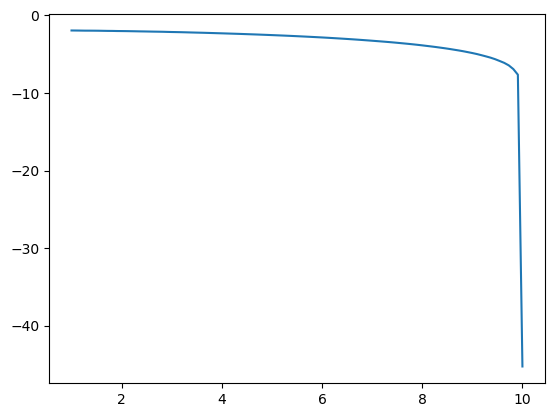

In [19]:
plt.plot( Bin['true_energy_center'], np.log(Reco.hist['Spectra']['nu_e']))
# Reco.hist['Spectra']

/tmp/ipykernel_12800/213932665.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


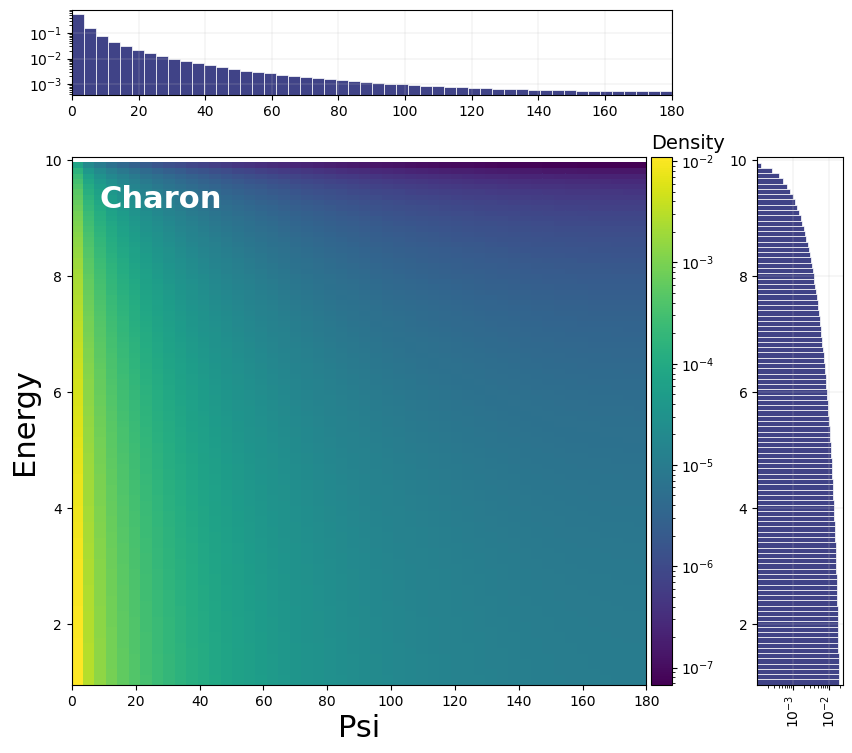

In [20]:
plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


In [21]:
RecoRate = np.zeros((len(Bin['reco_psi_center']), len(Bin['reco_energy_center'])))
for nutype in [ "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]:
    RecoRate += np.tensordot(RespInt[nutype], Rate[nutype], axes=([0,1], [0,1]))

/tmp/ipykernel_12800/3833629056.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoRate/np.sum(RecoRate), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))


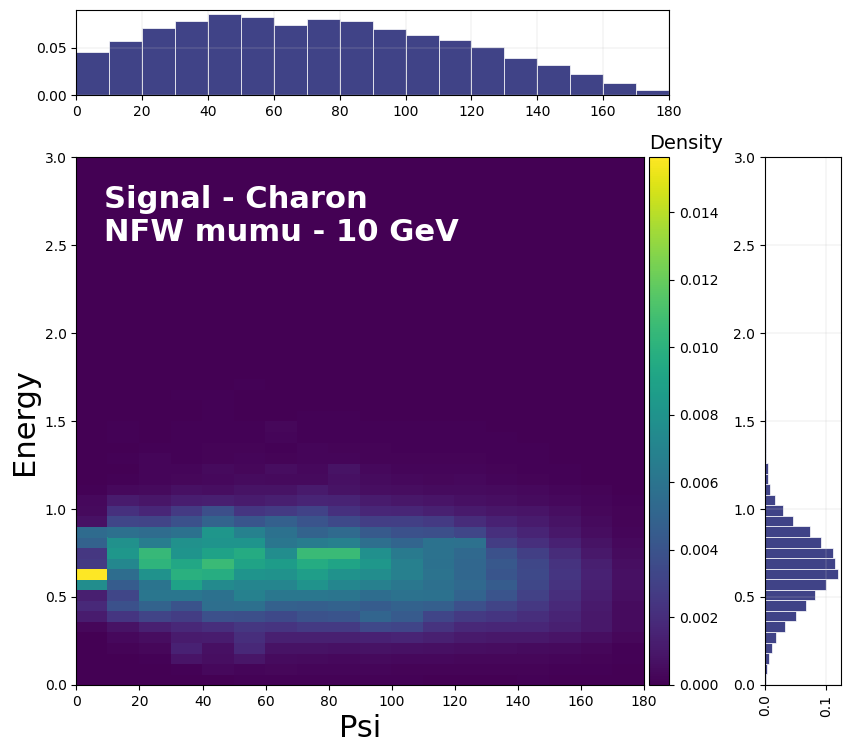

In [22]:
plot_projections(RecoRate/np.sum(RecoRate), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))

<font color="darkmagenta"> Response function with kde - separate reso + EffectiveArea </font>

In [107]:
# Compute the response matrix in log10Ereco, log10Etrue, logpsitrue and logpsireco

NEreco = 50
NEtrue = 200
Npsitrue = 100
Npsireco = 100
maxEtrue = 8100
maxEreco = 1000

logEtrue = np.linspace(np.log10(1), np.log10(maxEtrue), NEtrue)
logEreco = np.linspace(np.log10(1), np.log10(maxEreco), NEreco)
logpsitrue = np.linspace(np.log10(1e-2), np.log10(180), Npsitrue)
logpsireco = np.linspace(np.log10(1e-2), np.log10(180), Npsireco)


def makeedges(center):
    width = center[1]-center[0]
    edges = np.array([center[i]-width/2. for i in range(center.size)])
    edges = np.append(edges, edges[-1]+width)
    return edges


Edge =(makeedges(logpsitrue), makeedges(logEtrue), makeedges(logpsireco), makeedges(logEreco))

g_psi_true, g_energy_true, g_psi_reco, g_energy_reco = np.meshgrid(logpsitrue, logEtrue, 
            logpsireco, logEreco, indexing='ij')     

psiE_eval = np.vstack([g_psi_true.flatten(), g_energy_true.flatten(), g_psi_reco.flatten(), g_energy_reco.flatten()])

In [49]:
set = '0000'
MCcut = ExtractMC(['14'+set, '12'+set, '16'+set])

In [50]:

# Separate MC by each channel nutype->PID:
nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
# nu_types = ["nu_mu"]
Scramble=False
pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}
# PID = [[0.,0.5],[0.5, 0.85],[0.85, 1]]
PID = [[0.,1.]]
Reso = dict()
pidbin = 0
for pid in PID:
    print("Computing {} PID bin".format(pid))
    # Resp[pidbin] = dict()
    # pidbin += 1
    for nu_type in nu_types:
        print("----{}".format(nu_type))

        psireco=MCcut["psi_reco"]
        if Scramble:
            print("Scrambled Response matrix")
            RAreco = MCcut["RA_reco"]
            Decreco = MCcut["Dec_reco"]
            # Create scramble RA:
            RAreco_Scr = np.random.uniform(0,2.*np.pi, size=len(RAreco))
            # Get correct psi from scramble RA and original DEC
            psireco = np.rad2deg(psi_f(RAreco_Scr, Decreco))

        loc = np.where(  (MCcut["nutype"]==pdg_encoding[nu_type]) & (MCcut["PID"]>=pid[0])
                        & (MCcut["PID"]<=pid[1]) 
                        & (MCcut["E_reco"] < maxEreco)
                        & (MCcut["E_reco"] > 1.)
                        & (MCcut["E_true"] > 1.)
                        & (MCcut["E_true"] < maxEtrue)
                        # & (MCcut["w"] < 4000)
                        # & (MCcut["E_true"] > np.min(Bin["true_energy_center"]))
                        # & (MCcut["psi_true"] < np.max(Bin["true_psi_center"]))
                        # & (MCcut["psi_true"] > np.min(Bin["true_psi_center"]))
                        # & (psireco < np.max(Bin["reco_psi_center"]))
                        # & (psireco > np.min(Bin["reco_psi_center"]))
                        )
    
        #Extract MC events: 
        #NOTE: input psi in deg!
        psitrue = MCcut["psi_true"][loc]
        Etrue = MCcut["E_true"][loc]
        psireco = psireco[loc]
        Ereco = MCcut["E_reco"][loc]
        w = MCcut["w"][loc]        


        print("Preparing train grid")    
        psiE_train = np.vstack([np.log10(psitrue), np.log10(Etrue), np.log10(psireco), np.log10(Ereco)])
        
        print("Evaluating KDE.....")    

        kde_w = kde_FFT(psiE_train.T, psiE_eval.T, bandwidth='ISJ', weights=w)
        #Needs to be divided by evaluation angle
        # kde_weight = kde_w.reshape(psi_eval_true.shape)
        # kde_weight = kde_w/(psi_eval_true * psi_eval_reco)
        Reso[nu_type] = kde_w.reshape(logpsitrue.size, logEtrue.size, logpsireco.size, logEreco.size)
        # Resp[nu_type] = kde_w

Computing [0.0, 1.0] PID bin
----nu_e
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.0002798  0.00038094 0.00029111 0.00027025]
----nu_mu
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.00035396 0.00040507 0.00033836 0.00030861]
----nu_tau
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.00033967 0.00040566 0.00033423 0.00030755]
----nu_e_bar
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.00023916 0.00038435 0.00024399 0.00029064]
----nu_mu_bar
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.00033442 0.00034643 0.00027957 0.00029037]
----nu_tau_bar
Preparing train grid
Evaluating KDE.....
dimension: 4
bandwidth: 
[0.00032273 0.00049547 0.00031148 0.00033369]


In [51]:
# properly normalize the rersolution:
for nutype in ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]:
    nonnumber = np.array([])
    Reso_norm = np.zeros(Reso[nutype].shape)
    for iE in range(0, 100):
        for ipsi in range(0, 50):
            temp = Reso[nutype][ipsi, iE, 0:18, 0:50]
            if np.sum(temp) == 0: 
                print("warning")
                print("iE {}, ipsi {}".format(iE, ipsi))
                continue
            # testsum = 0
            for jE in range(0, 50):
                for jpsi in range(0, 18):
                    Reso_norm[ipsi, iE, jpsi, jE] = Reso[nutype][ipsi, iE, jpsi, jE]/np.sum(temp)
    Reso[nutype] = Reso_norm

In [52]:
pkl.dump(Reso, open("./PreComp/TestResolution.pkl", "wb"))

In [43]:

# Separate MC by each channel nutype->PID:
nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
# nu_types = ["nu_mu"]
Scramble=False
pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}
# PID = [[0.,0.5],[0.5, 0.85],[0.85, 1]]
PID = [[0.,1.]]
Eff = dict()
EffMC = dict()
pidbin = 0

g_psi_true, g_energy_true= np.meshgrid(logpsitrue, logEtrue, indexing='ij')     

psiE_eval = np.vstack([g_psi_true.flatten(), g_energy_true.flatten()])

for pid in PID:
    print("Computing {} PID bin".format(pid))
    # Resp[pidbin] = dict()
    # pidbin += 1
    for nu_type in nu_types:
        print("----{}".format(nu_type))

        psireco=MCcut["psi_reco"]
        if Scramble:
            print("Scrambled Response matrix")
            RAreco = MCcut["RA_reco"]
            Decreco = MCcut["Dec_reco"]
            # Create scramble RA:
            RAreco_Scr = np.random.uniform(0,2.*np.pi, size=len(RAreco))
            # Get correct psi from scramble RA and original DEC
            psireco = np.rad2deg(psi_f(RAreco_Scr, Decreco))

        loc = np.where(  (MCcut["nutype"]==pdg_encoding[nu_type]) & (MCcut["PID"]>=pid[0])
                        & (MCcut["PID"]<=pid[1]) 
                        # & (MCcut["E_reco"] < maxEreco)
                        # & (MCcut["E_reco"] > np.min(Bin["reco_energy_center"]))
                        & (MCcut["E_true"] <= maxEtrue)
                        # & (MCcut["E_reco"] < maxEreco)
                        # & (MCcut["E_reco"] > 1.)
                        & (MCcut["E_true"] >= 1.)
                        # & (MCcut["w"] < 2000)
                        # & (MCcut["E_true"] > np.min(Bin["true_energy_center"]))
                        # & (MCcut["psi_true"] < np.max(Bin["true_psi_center"]))
                        & (MCcut["psi_true"] >= 1e-2)
                        # & (MCcut["psi_reco"] >= 1e-2)
                        # & (psireco < np.max(Bin["reco_psi_center"]))
                        # & (psireco > np.min(Bin["reco_psi_center"]))
                        )
    
        #Extract MC events: 
        #NOTE: input psi in deg!
        psitrue = MCcut["psi_true"][loc]
        Etrue = MCcut["E_true"][loc]
        psireco = psireco[loc]
        Ereco = MCcut["E_reco"][loc]
        w = MCcut["w"][loc]        


        print("Preparing train grid")    
        psiE_train = np.vstack([np.log10(psitrue), np.log10(Etrue)])
        
        print("Evaluating KDE.....")    

        kde_w = kde_FFT(psiE_train.T, psiE_eval.T, bandwidth='ISJ', weights=w)
        #Needs to be divided by evaluation angle
        # kde_weight = kde_w.reshape(psi_eval_true.shape)
        # kde_weight = kde_w/(psi_eval_true * psi_eval_reco)
        Eff[nu_type] = kde_w.reshape(logpsitrue.size, logEtrue.size)
        Eff[nu_type] = Eff[nu_type]/np.sum(Eff[nu_type])* np.sum(w)
        # Eff[nu_type] = Eff[nu_type]* (Edge[0][1]-Edge[0][0])*(Edge[1][1]-Edge[1][0])
        EffMC[nu_type], histedges = np.histogramdd((np.log10(psitrue), np.log10(Etrue)),
                            bins = (Edge[0], Edge[1]),
                            weights=w)


Computing [0.0, 1.0] PID bin
----nu_e
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00027991 0.00038089]
----nu_mu
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00035403 0.00040509]
----nu_tau
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00033962 0.0004056 ]
----nu_e_bar
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00023911 0.00038427]
----nu_mu_bar
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00033435 0.00034636]
----nu_tau_bar
Preparing train grid
Evaluating KDE.....
dimension: 2
bandwidth: 
[0.00032273 0.00050807]


In [18]:
Edge[0]

array([-2.34044137, -2.26472882, -2.18901628, -2.11330373, -2.03759119,
       -1.96187864, -1.8861661 , -1.81045355, -1.73474101, -1.65902846,
       -1.58331592, -1.50760337, -1.43189083, -1.35617828, -1.28046574,
       -1.20475319, -1.12904065, -1.0533281 , -0.97761556, -0.90190301,
       -0.82619047, -0.75047792, -0.67476538, -0.59905283, -0.52334029,
       -0.44762774, -0.3719152 , -0.29620265, -0.22049011, -0.14477756,
       -0.06906502,  0.00664753,  0.08236007,  0.15807262,  0.23378516,
        0.30949771,  0.38521025,  0.4609228 ,  0.53663534,  0.61234789,
        0.68806043,  0.76377297,  0.83948552,  0.91519806,  0.99091061,
        1.06662315,  1.1423357 ,  1.21804824,  1.29376079,  1.36947333,
        1.44518588,  1.52089842,  1.59661097,  1.67232351,  1.74803606,
        1.8237486 ,  1.89946115,  1.97517369,  2.05088624,  2.12659878,
        2.20231133,  2.27802387,  2.35373642,  2.42944896,  2.50516151,
        2.58087405,  2.6565866 ,  2.73229914,  2.80801169,  2.88

/tmp/ipykernel_24897/3138958647.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Eff['nu_e'], np.array([Edge[0], Edge[1]]), "Psi", "Energy", "kde", zlogscale=True)


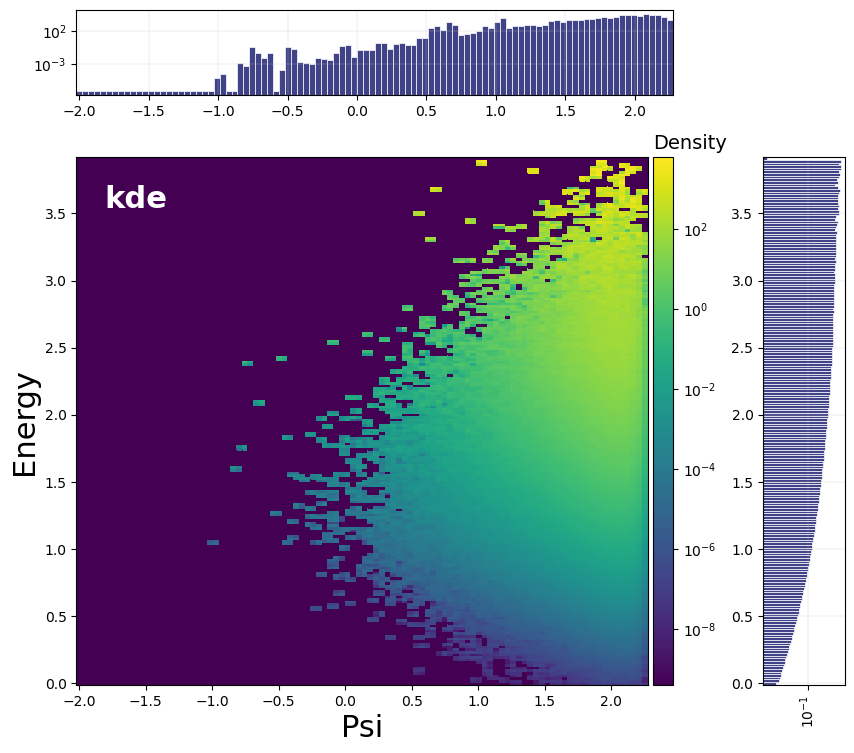

/tmp/ipykernel_24897/3138958647.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(EffMC['nu_e'], np.array([Edge[0], Edge[1]]), "Psi", "Energy", "evtbyevt", zlogscale=True)


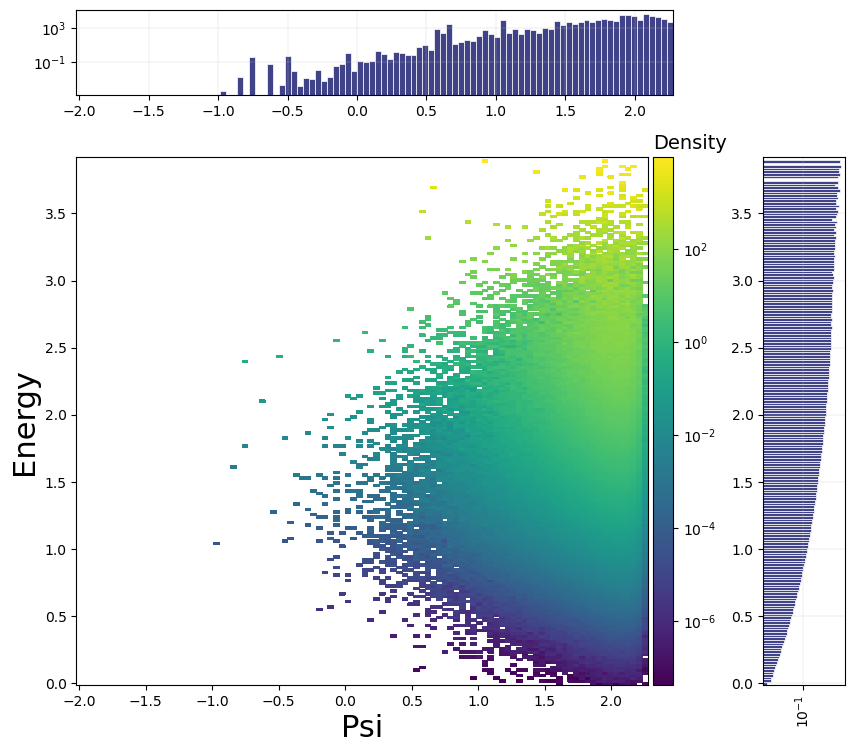

In [45]:
plot_projections(Eff['nu_e'], np.array([Edge[0], Edge[1]]), "Psi", "Energy", "kde", zlogscale=True)
plot_projections(EffMC['nu_e'], np.array([Edge[0], Edge[1]]), "Psi", "Energy", "evtbyevt", zlogscale=True)



In [46]:
def weighted_percentile(data, percents, weights=None):
    ''' percents in units of 1%
        weights specifies the frequency (count) of data.
    '''
    if weights is None:
        return np.percentile(data, percents)
    ind=np.argsort(data)
    d=data[ind]
    w=weights[ind]
    p=1.*w.cumsum()/w.sum()*100
    y=np.interp(percents, p, d)
    return y


Text(0, 0.5, 'reco energy [GeV]')

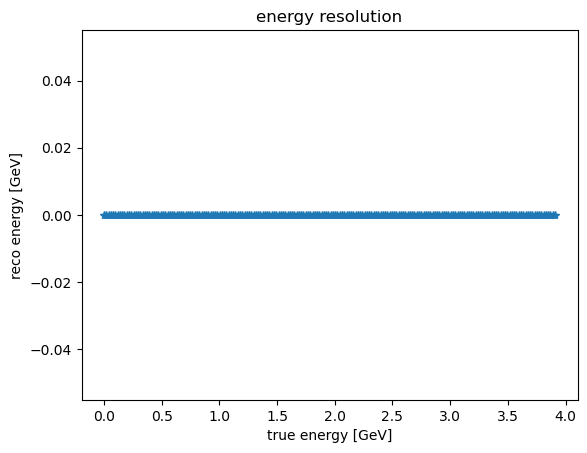

In [62]:
E = np.array([])
median = np.array([])
low = np.array([])
up = np.array([])

for i in range(logEtrue.size):
    Ereco = Reso['nu_e'][25][i][25][0:logEreco.size-1]
    a = weighted_percentile(Ereco, (10, 50, 90))
    median = np.append(median, a[1])
    low = np.append(low, a[0])
    up = np.append(up, a[2])
plt.plot(logEtrue, median, marker='*')
# plt.plot(logEtrue, low)
# plt.plot(logEtrue, up)
# plt.xscale('log')
# plt.yscale('log')
plt.title('energy resolution')
plt.xlabel('true energy [GeV]')
plt.ylabel('reco energy [GeV]')    


In [68]:
Reso['nu_e'].

(100, 200, 100, 50)

In [100]:
Reso['nu_e'][12,25,0:(logpsireco.size-1),0:(logEreco.size-1)].shape

(99, 49)

In [99]:
logpsireco.size

100

In [101]:
Reso['nu_e'].shape

(100, 200, 100, 50)

In [3]:
set = '0000'

MCdict = ExtractMC(['14'+set, '12'+set, '16'+set])
loc = np.where(  (MCdict["nutype"]==12) & (MCdict["w"]<=5000) & (MCdict["E_true"]<=8000))      
psitrue = MCdict["psi_true"][loc]
Etrue = MCdict["E_true"][loc]
psireco = MCdict["psi_reco"][loc]
Ereco = MCdict["E_reco"][loc]
weight = MCdict["w"][loc]

# # Prepare sample for training:
# if variables=='2Dreco':
#     psiE_train = np.vstack([np.log10(psireco),np.log10(Ereco)])
# if variables=='2Dtrue':
#     psiE_train = np.vstack([np.log10(psitrue),np.log10(Etrue)])
# if variables=='4D':
psiE_train = np.vstack([np.log10(psitrue),np.log10(Etrue), np.log10(psireco),np.log10(Ereco)])


d = psiE_train.shape[0]
n = psiE_train.shape[1]
print('dimension: {}'.format(d))
print('length of the sample {}'.format(n))
bw_scott = n**(-1./(d+4))
bw_silverman = (n * (d + 2) / 4.)**(-1. / (d + 4))

print('scott: {},  silverman: {}'.format(bw_scott, bw_silverman))

dimension: 4
length of the sample 928119
scott: 0.17949383724534046,  silverman: 0.17062322038902275


In [4]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
def bw_crossvalid(x, bandwidths,weights=None):
    
    '''
    Cross-validation method - Implemented within sklearn
    '''
    
    grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': bandwidths}, cv=3, n_jobs=-1)
    print ("Grid created")
    
    grid.fit(x.T, sample_weight=weights)
    print ("Grid estimated")

    #Use best estimator to compute the KDE
    bw = grid.best_estimator_.bandwidth
    print ("Best bw estimate found")
    print ("Best bw estimate: {}".format(bw))

    return float(bw)

In [5]:
# bw = np.arange(0.1, 0.2, 0.05)
bw = np.array([0.02, 0.03, 0.04])

In [6]:
bw_cv = bw_crossvalid(psiE_train, bw, weights = weight)

Grid created


KeyboardInterrupt: 